In [147]:
# Import the required packages
import os
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import librosa.display
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
print(3)

3


we will be using [spela](https://github.com/kongkip/spela) a package used to compute speech features 
e.g spectrograms and melspectrograms implemented using tf.keras to take advantage of GPU during computations

In [148]:
# a package to compute speech features, implemented using tf.keras
try:
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
except:
    !pip install spela
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
print(3)

3


In [149]:
# disable eager execution, my model couldn't train well while on eager mode
tf.compat.v1.disable_eager_execution()

In [150]:
# Get the data directories
data_dir = r"C:/Users/ASUS/OneDrive - BUET/Desktop/SR_DSP/TestData"

In [151]:
# inspect the folders inside the dataset
os.listdir(data_dir)

['ID_32', 'ID_33', 'ID_35', 'ID_41', 'ID_45']

In [152]:
# for now we are concerned with the four speakers
# lets get as a sample data from one of the speakers
ID_33 = [item for item in os.listdir(data_dir + "\ID_33")]
ID_33[:10]

['ID_33_1.wav', 'ID_33_2.wav', 'ID_33_3.wav', 'ID_33_4.wav', 'ID_33_5.wav']

In [153]:
# lets create a function that takes in a raw wavfile and computes a spectrogram then plots it
def compute_spectrogram_melspectrogram_and_plot(wav_dir, compute_type):
    with tf.compat.v1.Session(graph=tf.compat.v1.Graph()) as sess:
        wav_filename_placeholder = tf.compat.v1.placeholder(tf.compat.v1.string, [])
        wav_loader = tf.io.read_file(wav_filename_placeholder)
        wav_decoder = tf.audio.decode_wav(wav_loader, desired_channels=1)
        wav_data = sess.run(
        wav_decoder, feed_dict={
            wav_filename_placeholder: wav_dir
        }).audio.flatten()
        sess.close()
    # audio has a sample rate of 16000 and the produced wav has a shape of (16000, 1)
    # reshape to (1, 1600)
    wav = wav_data.reshape(1, 16000)
    wav_new = wav[np.newaxis, :] # introduce a new axis to have a shape of (1, 1, 16000)
    height = wav_new.shape[1]
    width = wav_new.shape[2]
    # create a model to compute spectrogram
    model = tf.keras.Sequential() 
    if compute_type == "spectrogram":
        model.add(Spectrogram(n_dft=1024, n_hop=256, input_shape=(height, width),
                            return_decibel_spectrogram=True, power_spectrogram=2.0,
                            trainable_kernel=False, name='static_stft'))
    elif compute_type == "melspectrogram":
        model.add(Melspectrogram(sr=16000, n_mels=128,n_dft=1024, n_hop=256,
                            input_shape=(height, width), return_decibel_melgram=True,
                            trainable_kernel=False, name='melgram'))
   
    # producing a spectrogram/melspectrogram from the model
    pred = model.predict(x=wav_new)

    if tf.keras.backend.image_data_format() == "channel_first":
        result = pred[0, 0]
    else:
        result = pred[0, :, :, 0]

    # show the spectrogram/melspectrogram
    librosa.display.specshow(result, y_axis='linear', sr=16000)
    return pred


[[-76.55336 ]
 [-76.27617 ]
 [-75.52218 ]
 [-77.973236]
 [-80.      ]
 [-80.      ]
 [-76.84894 ]
 [-74.37315 ]
 [-75.81583 ]
 [-80.      ]
 [-80.      ]
 [-77.783554]
 [-78.67146 ]
 [-80.      ]
 [-80.      ]
 [-80.      ]
 [-76.60176 ]
 [-73.96156 ]
 [-74.89264 ]
 [-77.73685 ]
 [-78.88894 ]
 [-80.      ]
 [-78.91669 ]
 [-78.50668 ]
 [-52.860466]
 [-43.21775 ]
 [-43.132027]
 [-50.40383 ]
 [-58.318497]
 [-71.796875]
 [-69.14201 ]
 [-80.      ]
 [-58.415855]
 [-65.54613 ]
 [-59.03772 ]
 [-45.35162 ]
 [-45.263165]
 [-55.41397 ]
 [-68.51432 ]
 [-77.99416 ]
 [-64.328224]
 [-52.791294]
 [-48.54243 ]
 [-52.006706]
 [-75.65428 ]
 [-71.91223 ]
 [-80.      ]
 [-80.      ]
 [-70.9146  ]
 [-77.79474 ]
 [-77.204346]
 [-73.27139 ]
 [-64.671936]
 [-62.75803 ]
 [-67.64172 ]
 [-80.      ]
 [-77.89899 ]
 [-80.      ]
 [-77.28937 ]
 [-76.07831 ]
 [-67.08862 ]
 [-43.840775]
 [-40.450462]]
(1, 513, 63, 1)


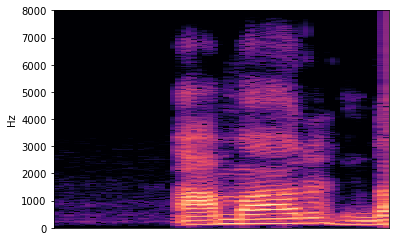

In [154]:
z = compute_spectrogram_melspectrogram_and_plot(data_dir + "/ID_33/" + ID_33[4], "spectrogram")

print(z[0,0])
print(z.shape)

array([[[[-39.186203],
         [-42.468193],
         [-39.900036],
         ...,
         [-31.630747],
         [-22.111752],
         [-18.994678]],

        [[-41.579987],
         [-45.240833],
         [-45.277878],
         ...,
         [-28.257896],
         [-21.498295],
         [-17.41467 ]],

        [[-42.062256],
         [-48.20337 ],
         [-44.726326],
         ...,
         [-27.315567],
         [-18.373478],
         [-15.152241]],

        ...,

        [[-46.961758],
         [-46.330116],
         [-46.18717 ],
         ...,
         [-44.489155],
         [-28.388916],
         [-23.510958]],

        [[-48.903233],
         [-48.911995],
         [-49.343872],
         ...,
         [-47.65149 ],
         [-28.570107],
         [-23.673199]],

        [[-53.866158],
         [-54.06975 ],
         [-52.95924 ],
         ...,
         [-52.51354 ],
         [-28.945072],
         [-24.009043]]]], dtype=float32)

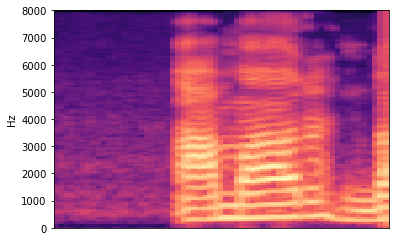

In [155]:
compute_spectrogram_melspectrogram_and_plot(data_dir + "/ID_33/" + ID_33[4], "melspectrogram")

# Process training dataset

In [156]:
# get wav paths
def get_wav_paths(speaker):
    speaker_path = data_dir + speaker
    all_paths = [item for item in os.listdir(speaker_path)]
    return all_paths

In [157]:
id_32_path = get_wav_paths("/ID_32")
id_33_path = get_wav_paths("/ID_33")
id_35_path = get_wav_paths("/ID_35")
id_41_path = get_wav_paths ("/ID_41")
id_45_path = get_wav_paths ("/ID_45")



In [158]:
# load the data
def load_wav(wav_path, speaker):
    with tf.compat.v1.Session(graph=tf.compat.v1.Graph()) as sess:
        wav_path = data_dir +speaker + "/"+ wav_path
        wav_filename_placeholder = tf.compat.v1.placeholder(tf.compat.v1.string, [])
        wav_loader = tf.io.read_file(wav_filename_placeholder)
        wav_decoder = tf.audio.decode_wav(wav_loader, desired_channels=1)
        wav_data = sess.run(
            wav_decoder, feed_dict={
                wav_filename_placeholder: wav_path
            }).audio.flatten().reshape((1, 16000))
        sess.close()
    return wav_data
    

In [159]:
# create training data
def generate_training_data(speaker_paths, speaker, label):
    wavs, labels = [], []
    for i in tqdm(speaker_paths):
        wav = load_wav(i, speaker)
        wavs.append(wav)
        labels.append(label)
    return wavs, labels


In [160]:
id_32_wavs, id_32_labels = generate_training_data(id_32_path, "/ID_32",0) 
id_33_wavs, id_33_labels = generate_training_data(id_33_path, "/ID_33",1) 
id_35_wavs, id_35_labels = generate_training_data(id_35_path, "/ID_35",2)
id_41_wavs, id_41_labels = generate_training_data(id_41_path, "/ID_41",3)
id_45_wavs, id_45_labels = generate_training_data(id_45_path, "/ID_45",4)

#id_41_wavs, id_41_labels = generate_training_data(id_41_path, "/ID_41", 41) 


100%|██████████| 5/5 [00:00<00:00, 162.95it/s]


In [161]:
all_wavs = id_32_wavs + id_33_wavs + id_35_wavs + id_41_wavs + id_45_wavs
all_labels = id_32_labels + id_33_labels + id_35_labels + id_41_labels  + id_45_labels

print(all_labels)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]


In [162]:
# split the dataset into trainin and testing set\
train_wavs, test_wavs, train_labels, test_labels = train_test_split(all_wavs, all_labels, test_size=0.2)

In [163]:
train_x, train_y = np.array(train_wavs), np.array(train_labels)
test_x, test_y = np.array(test_wavs), np.array(test_labels)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(20, 1, 16000)
(20,)
(5, 1, 16000)
(5,)


In [164]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

# Create a simple model

In [165]:
# create a model
def create_model(speech_feature):
    model = tf.keras.Sequential()
    if speech_feature == "spectrogram":
        model.add(Spectrogram(n_dft=1024, n_hop=256, input_shape=(1, 16000),
                            return_decibel_spectrogram=True, power_spectrogram=2.0,
                            trainable_kernel=False, name='static_stft'))
    elif speech_feature == "melspectrogram":
        model.add(Melspectrogram(sr=16000, n_mels=128,n_dft=1024, n_hop=256,
                            input_shape=(1 , 16000),return_decibel_melgram=True,
                            trainable_kernel=False, name='melgram'))
   

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(5, activation="softmax"))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate =3e-4)
            , loss = "categorical_crossentropy"
            , metrics = ["accuracy"])
    return model

In [166]:
# spectrogam model
model_1 = create_model("spectrogram")

In [167]:
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 513, 63, 1)        1050624   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 511, 61, 64)       640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 255, 30, 64)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 489600)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 2448005   
Total params: 3,499,269
Trainable params: 3,499,269
Non-trainable params: 0
_________________________________________________________________


In [168]:
model_1.fit(x=train_x, y=train_y, epochs=100, validation_data=(test_x, test_y))

Train on 20 samples, validate on 5 samples
Epoch 1/100
20/20 [==============================] - 1s 53ms/sample - loss: 6.8540 - accuracy: 0.2000 - val_loss: 165.4342 - val_accuracy: 0.2000
Epoch 2/100
20/20 [==============================] - 0s 24ms/sample - loss: 164.7110 - accuracy: 0.6500 - val_loss: 434.1526 - val_accuracy: 0.2000
Epoch 3/100
20/20 [==============================] - 1s 28ms/sample - loss: 428.6245 - accuracy: 0.2000 - val_loss: 438.0247 - val_accuracy: 0.2000
Epoch 4/100
20/20 [==============================] - 1s 28ms/sample - loss: 427.8607 - accuracy: 0.2000 - val_loss: 373.5970 - val_accuracy: 0.4000
Epoch 5/100
20/20 [==============================] - 1s 28ms/sample - loss: 366.5595 - accuracy: 0.1500 - val_loss: 624.2733 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 1s 26ms/sample - loss: 517.1941 - accuracy: 0.2500 - val_loss: 594.4783 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 1s 27ms/sa

Epoch 56/100
20/20 [==============================] - 1s 29ms/sample - loss: 2.9802e-08 - accuracy: 1.0000 - val_loss: 59.2853 - val_accuracy: 0.4000
Epoch 57/100
20/20 [==============================] - 1s 31ms/sample - loss: 1.1921e-08 - accuracy: 1.0000 - val_loss: 59.2237 - val_accuracy: 0.4000
Epoch 58/100
20/20 [==============================] - 1s 26ms/sample - loss: 5.9605e-09 - accuracy: 1.0000 - val_loss: 59.1447 - val_accuracy: 0.4000
Epoch 59/100
20/20 [==============================] - 1s 28ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 59.0542 - val_accuracy: 0.4000
Epoch 60/100
20/20 [==============================] - 1s 28ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 58.9574 - val_accuracy: 0.4000
Epoch 61/100
20/20 [==============================] - 1s 31ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 58.8587 - val_accuracy: 0.4000
Epoch 62/100
20/20 [==============================] - 1s 29ms/sample - loss: 0.0000e+00 - accuracy: 

In [169]:
# melspectrogram model
model_2 = create_model("melspectrogram")

In [170]:
model_2.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
melgram (Melspectrogram)     (None, 128, 63, 1)        1116288   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 126, 61, 64)       640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 30, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 120960)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 604805    
Total params: 1,721,733
Trainable params: 1,721,733
Non-trainable params: 0
_________________________________________________________________


In [171]:
model_2.fit(x=train_x, y=train_y, epochs=100, validation_data=(test_x, test_y))

Train on 20 samples, validate on 5 samples
Epoch 1/100
20/20 [==============================] - 1s 40ms/sample - loss: 4.3904 - accuracy: 0.3000 - val_loss: 1.4629 - val_accuracy: 0.6000
Epoch 2/100
20/20 [==============================] - 0s 10ms/sample - loss: 66.1520 - accuracy: 0.7500 - val_loss: 35.3413 - val_accuracy: 0.2000
Epoch 3/100
20/20 [==============================] - 0s 10ms/sample - loss: 104.3819 - accuracy: 0.2000 - val_loss: 72.8992 - val_accuracy: 0.6000
Epoch 4/100
20/20 [==============================] - 0s 10ms/sample - loss: 141.7600 - accuracy: 0.3500 - val_loss: 83.6819 - val_accuracy: 0.2000
Epoch 5/100
20/20 [==============================] - 0s 10ms/sample - loss: 115.7492 - accuracy: 0.2000 - val_loss: 38.8435 - val_accuracy: 0.6000
Epoch 6/100
20/20 [==============================] - 0s 13ms/sample - loss: 52.6616 - accuracy: 0.5500 - val_loss: 85.1420 - val_accuracy: 0.2000
Epoch 7/100
20/20 [==============================] - 0s 12ms/sample - loss: 63.5

Epoch 56/100
20/20 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.5991 - val_accuracy: 0.6000
Epoch 57/100
20/20 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.5129 - val_accuracy: 0.6000
Epoch 58/100
20/20 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.4329 - val_accuracy: 0.6000
Epoch 59/100
20/20 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.3251 - val_accuracy: 0.6000
Epoch 60/100
20/20 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.1399 - val_accuracy: 0.6000
Epoch 61/100
20/20 [==============================] - 0s 9ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.1187 - val_accuracy: 0.6000
Epoch 62/100
20/20 [==============================] - 0s 9ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 -

In [172]:
z,sr = librosa.load("C:/Users/ASUS/OneDrive - BUET/Desktop/SR_DSP/TestData/ID_35/ID_35_5.wav",duration=1,sr=16000)
z = np.array(z,dtype=object)
z = z.reshape(1,16000)
z = z[np.newaxis,:]
y = model_2.predict(z)
idx = np.where(y==1.0)
print(idx[1]+1)

[3]
